In [14]:
import pandas as pd
import numpy as np
import datetime as dt
from pandas.plotting import scatter_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import plotly.express as px
import plotly.graph_objects as go
rdata = pd.read_csv("Corporate_Energy_Consumption.csv")

for col in rdata.columns:
    print(col + ": " + str(rdata[col].dtype))

Business Unit Desc: object
FacilityName: object
Site ID: object
FacilityAddress: object
Energy Description: object
Year: int64
Month: object
Total Consumption: int64
Unit: object


Year,2014,2015,2016,2017,2018,2019,2020,2021
FacilityName,,,,,,,,
BEARSPAW WATER TREATMENT PLANT,27006979.0,22896652.0,34507602.0,37570393.0,34437203.0,27503120.0,34585362.0,20122592.0
BONNYBROOK WASTEWATER TREATMENT PLANT,25946479.0,18470960.0,18919634.0,24187268.0,30532643.0,28814674.0,26283641.0,21374437.0
CALGARY STREET LIGHTING,91870809.0,90922781.0,78855156.0,54751112.0,48574753.0,45044868.0,42802879.0,25261505.0
FISH CREEK WASTEWATER TREATMENT PLANT,NaN,NaN,12013694.0,7911196.0,12455848.0,8647091.0,13740451.0,7626078.0
GLENMORE WATER TREATMENT PLANT - WB,20752623.0,19647504.0,18619313.0,20468133.0,19762821.0,20062555.0,18482865.0,14085753.0
MUNICIPAL COMPLEX,1151483.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PINE CREEK WASTEWATER TREATMENT PLANT,21972952.0,23077646.0,21265638.0,21626015.0,21776522.0,23153347.0,23486956.0,15192188.0
SH - BLDG W (COMPOST FACILITY),NaN,NaN,NaN,3613911.0,14359899.0,10817489.0,NaN,3148365.0


<Figure size 259200x259200 with 0 Axes>

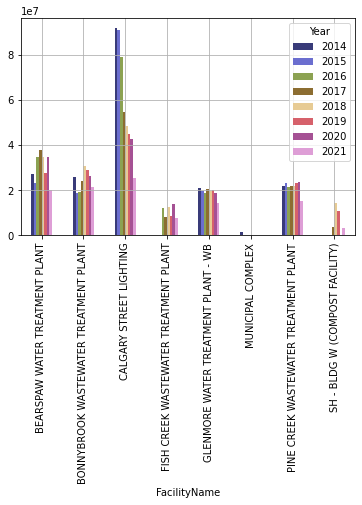

Year,2014,2015,2016,2017,2018,2019,2020,2021
FacilityName,,,,,,,,
BONNYBROOK WASTEWATER TREATMENT PLANT,330634.0,330946.0,301646.0,222472.0,297477.0,239497.0,324569.0,230045.0
BUS MAINTENANCE GARAGE - ANDERSON GARAGE,60583.0,36873.0,28061.0,60976.0,65357.0,65526.0,37648.0,13376.0
BUS MAINTENANCE GARAGE - SPRING GARDENS,84489.0,74310.0,90538.0,115916.0,107267.0,97391.0,89211.0,44413.0
BUS MAINTENANCE GARAGE - VICTORIA PARK,35680.0,46058.0,23843.0,23466.0,34771.0,33255.0,21858.0,11263.0
MANCHESTER ASPHALT PLANT,NaN,10875.0,21257.0,NaN,NaN,NaN,NaN,NaN
OLIVER BOWEN MAINTENANCE FACILITY,14030.0,NaN,10468.0,NaN,12024.0,12755.0,NaN,NaN
STONEY TRANSIT FACILITY,NaN,NaN,NaN,NaN,NaN,11107.0,90547.0,63122.0
VILLAGE SQUARE LEISURE CENTRE,NaN,NaN,10017.0,10098.0,43570.0,30835.0,11377.0,NaN


<Figure size 259200x259200 with 0 Axes>

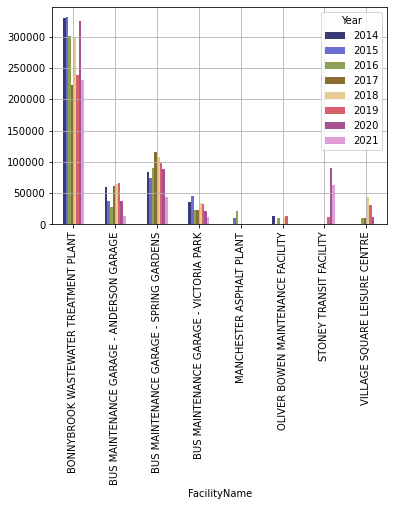

Year,2015,2016,2017,2018,2019,2020,2021
FacilityName,,,,,,,
BEARSPAW WATER TREATMENT PLANT,NaN,NaN,NaN,672336.0,645145.0,629182.0,303027.0
CORPORATE WAREHOUSE,NaN,NaN,116749.0,88286.0,78731.0,113931.0,89822.0
GLENMORE WATER TREATMENT PLANT - WB,NaN,NaN,286548.0,232262.0,257429.0,279510.0,171879.0
SH - BLDG W (COMPOST FACILITY),NaN,NaN,NaN,1052172.0,1316807.0,5369296.0,3088045.0
SOUTHLAND LEISURE CENTRE,29977.0,131036.0,156458.0,124332.0,146456.0,138671.0,104938.0
WHITEHORN MULTI SERVICE CENTRE,NaN,NaN,459307.0,365949.0,406581.0,367328.0,283833.0


<Figure size 259200x259200 with 0 Axes>

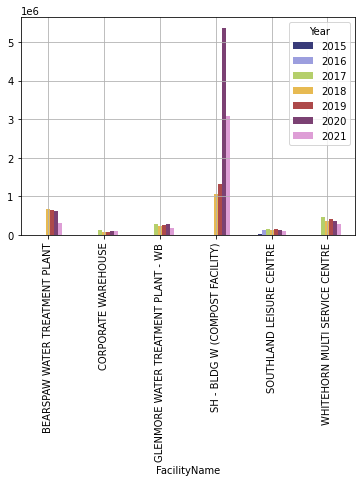

In [15]:
df = pd.DataFrame(rdata,columns=["Business Unit Desc","FacilityName","Site ID", "FacilityAddress","Energy Description",
                                 "Year","Month","Total Consumption","Unit"])
df1=pd.DataFrame.drop(rdata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df1 = df1.loc[df1['Energy Description'] == 'Electricity']
df1=df1.loc[df1['Total Consumption'] > 1000000]
df1=df1.loc[df1['Year'].between(2014,2021)]
df1.name = "Electricity Usage of each Year "
df1=df1.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=1)
display(df1)

fig = plt.figure()
df1.plot(kind='bar', colormap='tab20b', grid=True)
fig.set_size_inches(3600,3600)
plt.show()

df2=pd.DataFrame.drop(rdata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df2= df2.loc[df2['Energy Description'] == 'Natural Gas']
df2 =df2.loc[df2['Total Consumption'] > 10000]
df2 =df2.loc[df2['Year'].between(2014,2021)]
df2.name = "Natual Gas Usage of each Year "
df2=df2.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=1)
display(df2)

fig = plt.figure()
df2.plot(kind='bar', colormap='tab20b', grid=True)
fig.set_size_inches(3600,3600)
plt.show()


df3=pd.DataFrame.drop(rdata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df3 = df3.loc[df3['Energy Description'] == 'Solar Power']
df3=df3.loc[df3['Total Consumption'] > 10000]
df3=df3.loc[df3['Year'].between(2014,2021)]
df3.name = "Solar Power Usage of each Year "
df3=df3.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=1)

display(df3)

fig = plt.figure()
df3.plot(kind='bar', colormap='tab20b', grid=True)
fig.set_size_inches(3600,3600)
plt.show()




FacilityName,3 ST BARCLAY MALL,4TH STREET UNDERPASS,7TH AV LRT CORRIDOR NON-METERED STREETLIGHTS,ACADIA AQUATIC AND FITNESS CENTRE,AD VALOREM,AERO CENTRE,ALBERTA TRADE CENTRE - FM,ANDREW DAVISON,ANIMAL SERVICES CENTRE,APPARATUS REPAIR SHOP & SPARE APPARATUS SHOP,...,WATER CENTRE,WATER RE-USE STRUCTURE,WES099 - PRAIRIE WINDS PARK,WEST SUBSTATION AND CONTROL ROOM,WESTBROOK TOD,WESTWINDS POLICE CAMPUS - EAST BUILDING,WESTWINDS POLICE CAMPUS - WAREHOUSE,WESTWINDS POLICE CAMPUS - WEST BUILDING,WHITEHORN MULTI SERVICE CENTRE,WILDFLOWER ARTS CENTRE
Year,,,,,,,,,,,,,,,,,,,,,
2014,55464.0,NaN,98964.0,438705.0,1309660.0,235235.0,646908.0,1235794.0,580706.0,640819.0,...,1895934.0,211443.0,51023.0,1641170.0,1161590.0,7558501.0,NaN,4304147.0,4408196.0,176502.0
2015,43305.0,NaN,98715.0,471859.0,1222659.0,230391.0,532075.0,1193466.0,538537.0,650603.0,...,1734824.0,272157.0,47577.0,1800128.0,841522.0,7923039.0,NaN,4557305.0,4302462.0,172550.0
2016,56905.0,NaN,99147.0,431331.0,1231777.0,219050.0,531447.0,1232705.0,543501.0,634684.0,...,1647245.0,316067.0,27390.0,1198139.0,996404.0,7858835.0,132739.0,4406602.0,4169519.0,155547.0
2017,52765.0,NaN,98755.0,407361.0,1279861.0,236441.0,558693.0,1315133.0,547076.0,628888.0,...,1588680.0,283506.0,259456.0,1430622.0,1718628.0,7616623.0,440293.0,4164231.0,3250001.0,163928.0
2018,42358.0,NaN,98758.0,420290.0,1216295.0,221511.0,575728.0,1351524.0,522683.0,577381.0,...,1498681.0,298773.0,243541.0,1566456.0,2040689.0,7013947.0,512648.0,4197477.0,3213557.0,156297.0
2019,85677.0,62302.0,98917.0,427255.0,1062792.0,203256.0,538274.0,1246998.0,502924.0,571354.0,...,1375334.0,240750.0,311062.0,1849785.0,1943087.0,6946834.0,527733.0,3887130.0,2695880.0,156790.0
2020,18081.0,170859.0,99249.0,321948.0,1099202.0,203341.0,523843.0,1050978.0,526248.0,596491.0,...,1414746.0,220933.0,256882.0,1781119.0,1910473.0,6826694.0,580400.0,3337760.0,2547898.0,73680.0
2021,NaN,211989.0,40746.0,176646.0,776937.0,137823.0,324925.0,710605.0,350003.0,418874.0,...,964611.0,124229.0,220491.0,1184749.0,1268213.0,4521036.0,392457.0,2274395.0,1592373.0,44095.0


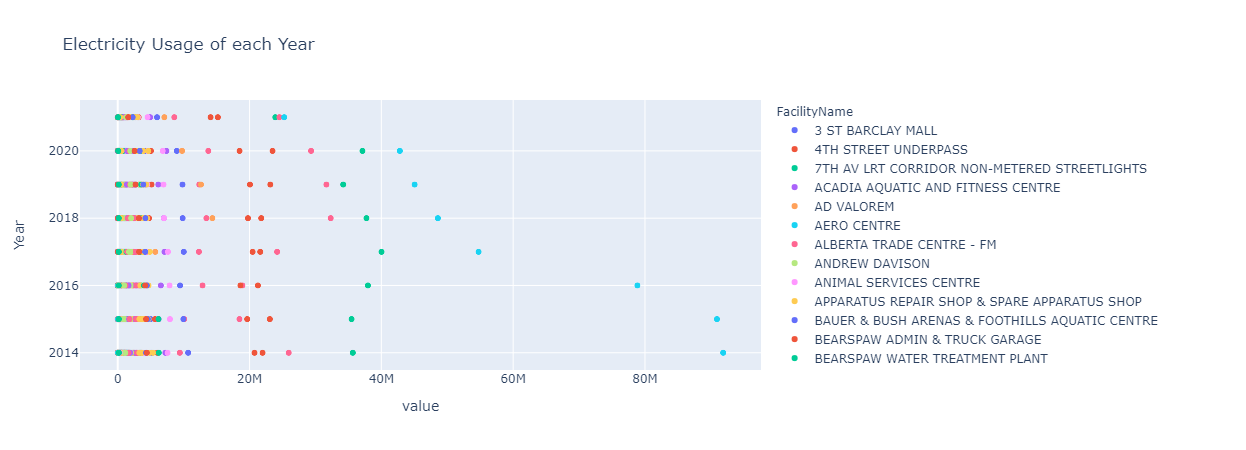

FacilityName,4 CORNERS OFFICE BUILDING,52 ST EAST AREA OFFICE,66 ST DEPOT,90 AV DEPOT,ACADIA AQUATIC AND FITNESS CENTRE,AD VALOREM,AERO CENTRE,ALBERTA TRADE CENTRE - FM,ANDREW DAVISON,ANIMAL SERVICES CENTRE,...,WAREHOUSE - 2042 10 AV SW,WAREHOUSE - 220 50 AV SE - JBW PIPE BUILDING,WATER CENTRE,WEST HILLHURST CIVIC BUILDING,WESTBROOK TOD,WESTWINDS POLICE CAMPUS - EAST BUILDING,WESTWINDS POLICE CAMPUS - WAREHOUSE,WESTWINDS POLICE CAMPUS - WEST BUILDING,WHITEHORN MULTI SERVICE CENTRE,WILDFLOWER ARTS CENTRE
Year,,,,,,,,,,,,,,,,,,,,,
2014,NaN,437.0,116.0,526.0,6122.0,6849.0,1811.0,3588.0,612.0,6054.0,...,708.0,1249.0,7829.0,NaN,7321.0,29074.0,NaN,23588.0,6888.0,1645.0
2015,NaN,414.0,90.0,488.0,6452.0,6089.0,1559.0,29.0,330.0,5282.0,...,645.0,723.0,6419.0,NaN,5073.0,26200.0,NaN,22264.0,5291.0,940.0
2016,NaN,402.0,86.0,426.0,6578.0,5990.0,1405.0,32.0,1590.0,5342.0,...,597.0,954.0,6995.0,NaN,6274.0,27445.0,2824.0,21598.0,5495.0,823.0
2017,NaN,292.0,102.0,424.0,5284.0,6079.0,1536.0,30.0,910.0,5541.0,...,685.0,1048.0,6667.0,NaN,6856.0,30474.0,3491.0,22284.0,6312.0,947.0
2018,NaN,262.0,102.0,418.0,5650.0,6088.0,1522.0,26.0,871.0,5762.0,...,779.0,1037.0,6310.0,NaN,5806.0,25071.0,3821.0,24547.0,5462.0,1098.0
2019,NaN,314.0,18.0,459.0,6091.0,6220.0,1595.0,23.0,964.0,6219.0,...,841.0,939.0,7062.0,NaN,6666.0,24369.0,3803.0,17386.0,5454.0,1197.0
2020,247.0,311.0,NaN,437.0,3245.0,6599.0,1537.0,13.0,692.0,5878.0,...,936.0,919.0,7280.0,NaN,6635.0,20988.0,4025.0,12810.0,4001.0,1019.0
2021,437.0,178.0,NaN,233.0,1966.0,3916.0,921.0,15.0,275.0,3195.0,...,582.0,607.0,3898.0,391.0,3926.0,13505.0,2421.0,8098.0,3357.0,549.0


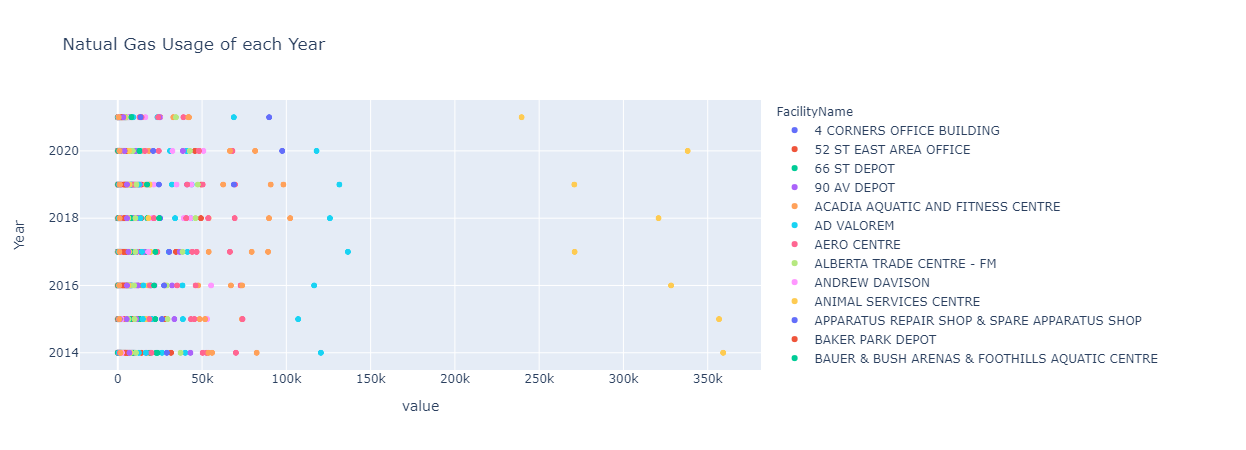

FacilityName,BEARSPAW SALT SILO,BEARSPAW WATER TREATMENT PLANT,CORPORATE WAREHOUSE,CTRAIN STATION - 69TH STREET SW,FIRE HEADQUARTERS,FIRE STATION 05 - SOUTH CALGARY,FIRE STATION 07 - MOUNT PLEASANT,FIRE STATION 08 - ROSSCARROCK,FIRE STATION 22 - TEMPLE,FIRE STATION 24 - CEDARBRAE,FIRE STATION 30 - MCKENZIE TOWNE,FIRE STATION 42 - TUSCANY,GLENMORE WATER TREATMENT PLANT - WB,MANCHESTER BUILDING M,SARCEE OWC - ADMINISTRATION BUILDING,SH - BLDG W (COMPOST FACILITY),SOUTHLAND LEISURE CENTRE,WHITEHORN MULTI SERVICE CENTRE
Year,,,,,,,,,,,,,,,,,,
2014,31758.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.0,NaN,1630.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,54302.0,NaN,NaN,NaN,NaN,1794.0,NaN,415.0,NaN,614.0,1740.0,NaN,NaN,NaN,NaN,NaN,36003.0,NaN
2016,53631.0,NaN,229.0,1436.0,NaN,5159.0,NaN,1166.0,1226.0,915.0,1756.0,NaN,NaN,NaN,NaN,NaN,163251.0,NaN
2017,42756.0,9791.0,132569.0,350.0,16602.0,5302.0,2971.0,1235.0,1795.0,1711.0,1617.0,NaN,292019.0,1042.0,NaN,NaN,167406.0,468438.0
2018,22981.0,678536.0,115763.0,19507.0,17848.0,5272.0,25943.0,1236.0,1824.0,1721.0,1572.0,2498.0,249555.0,31802.0,33588.0,1052172.0,142470.0,393663.0
2019,45727.0,652587.0,103240.0,34891.0,17954.0,4259.0,32719.0,1183.0,1753.0,1439.0,1425.0,20954.0,271695.0,40196.0,53846.0,1316807.0,152895.0,427151.0
2020,23335.0,635422.0,132935.0,41160.0,19166.0,4268.0,34678.0,1157.0,1797.0,1399.0,1096.0,22042.0,293788.0,42903.0,57656.0,5369296.0,158293.0,387335.0
2021,26322.0,303027.0,95881.0,28126.0,12960.0,2759.0,25033.0,785.0,1187.0,915.0,722.0,15798.0,180644.0,27365.0,41732.0,3088045.0,109947.0,302970.0


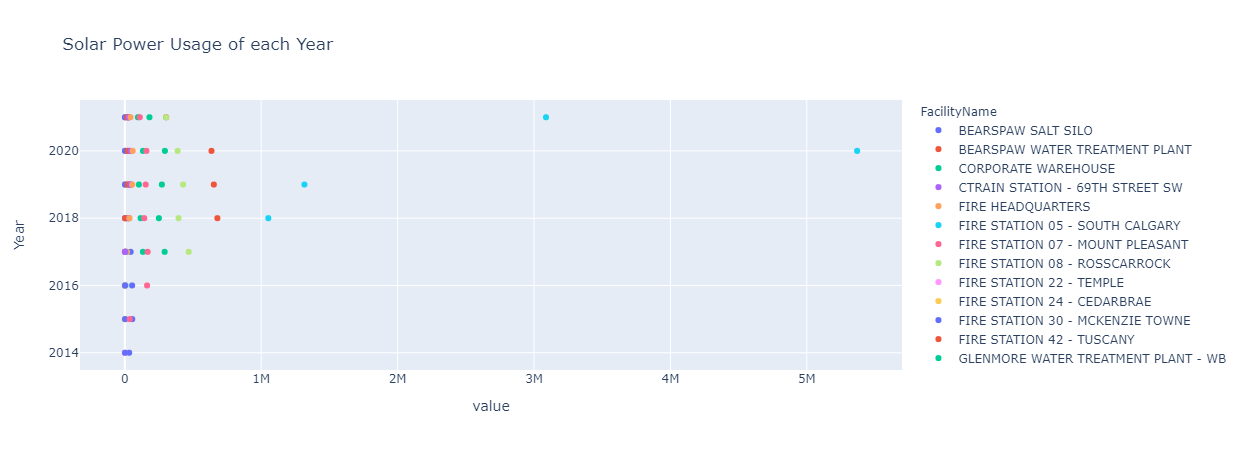

In [18]:
df = pd.DataFrame(rdata,columns=["Business Unit Desc","FacilityName","Site ID", "FacilityAddress","Energy Description",
                                 "Year","Month","Total Consumption","Unit"])
df1=pd.DataFrame.drop(rdata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df1 = df1.loc[df1['Energy Description'] == 'Electricity']
df1=df1.loc[df1['Total Consumption'] > 10000]
df1=df1.loc[df1['Year'].between(2014,2021)]
df1.name = "Electricity Usage of each Year "
df1=df1.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=0)
display(df1)
fig = px.scatter(df1, x=df1.columns, title = 'Electricity Usage of each Year ')
fig.show()

df2=pd.DataFrame.drop(rdata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df2= df2.loc[df2['Energy Description'] == 'Natural Gas']
df2 =df2.loc[df2['Total Consumption'] > 0]
df2 =df2.loc[df2['Year'].between(2014,2021)]
df2.name = "Natual Gas Usage of each Year "
df2=df2.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=0)
display(df2)

fig = px.scatter(df2, x=df2.columns, title ='Natual Gas Usage of each Year ')
fig.show()

df3=pd.DataFrame.drop(rdata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df3 = df3.loc[df3['Energy Description'] == 'Solar Power']
df3=df3.loc[df3['Total Consumption'] > 0]
df3=df3.loc[df3['Year'].between(2014,2021)]
df3.name = "Solar Power Usage of each Year "
df3=df3.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=0)
display(df3)

fig = px.scatter(df3, x=df3.columns, title = 'Solar Power Usage of each Year')
fig.show()

FacilityName,BEARSPAW WATER TREATMENT PLANT,BONNYBROOK WASTEWATER TREATMENT PLANT,CALGARY STREET LIGHTING,FISH CREEK WASTEWATER TREATMENT PLANT,GLENMORE WATER TREATMENT PLANT - WB,MUNICIPAL COMPLEX,PINE CREEK WASTEWATER TREATMENT PLANT,SH - BLDG W (COMPOST FACILITY)
Year,,,,,,,,
2014,27006979.0,25946479.0,91870809.0,NaN,20752623.0,1151483.0,21972952.0,NaN
2015,22896652.0,18470960.0,90922781.0,NaN,19647504.0,NaN,23077646.0,NaN
2016,34507602.0,18919634.0,78855156.0,12013694.0,18619313.0,NaN,21265638.0,NaN
2017,37570393.0,24187268.0,54751112.0,7911196.0,20468133.0,NaN,21626015.0,3613911.0
2018,34437203.0,30532643.0,48574753.0,12455848.0,19762821.0,NaN,21776522.0,14359899.0
2019,27503120.0,28814674.0,45044868.0,8647091.0,20062555.0,NaN,23153347.0,10817489.0
2020,34585362.0,26283641.0,42802879.0,13740451.0,18482865.0,NaN,23486956.0,NaN
2021,20122592.0,21374437.0,25261505.0,7626078.0,14085753.0,NaN,15192188.0,3148365.0


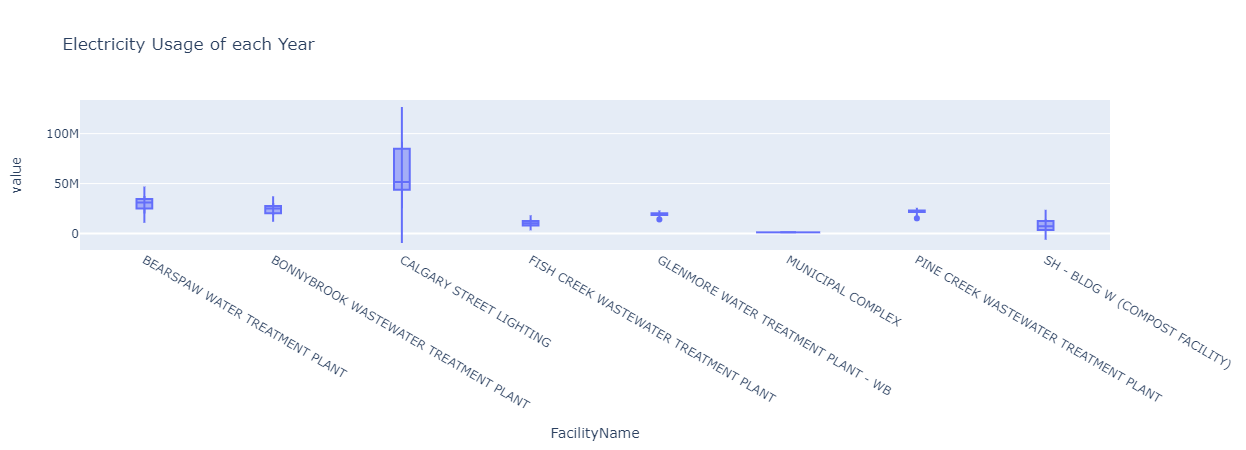

FacilityName,BONNYBROOK WASTEWATER TREATMENT PLANT,BUS MAINTENANCE GARAGE - ANDERSON GARAGE,BUS MAINTENANCE GARAGE - SPRING GARDENS,BUS MAINTENANCE GARAGE - VICTORIA PARK,MANCHESTER ASPHALT PLANT,OLIVER BOWEN MAINTENANCE FACILITY,STONEY TRANSIT FACILITY,VILLAGE SQUARE LEISURE CENTRE
Year,,,,,,,,
2014,330634.0,60583.0,84489.0,35680.0,NaN,14030.0,NaN,NaN
2015,330946.0,36873.0,74310.0,46058.0,10875.0,NaN,NaN,NaN
2016,301646.0,28061.0,90538.0,23843.0,21257.0,10468.0,NaN,10017.0
2017,222472.0,60976.0,115916.0,23466.0,NaN,NaN,NaN,10098.0
2018,297477.0,65357.0,107267.0,34771.0,NaN,12024.0,NaN,43570.0
2019,239497.0,65526.0,97391.0,33255.0,NaN,12755.0,11107.0,30835.0
2020,324569.0,37648.0,89211.0,21858.0,NaN,NaN,90547.0,11377.0
2021,230045.0,13376.0,44413.0,11263.0,NaN,NaN,63122.0,NaN


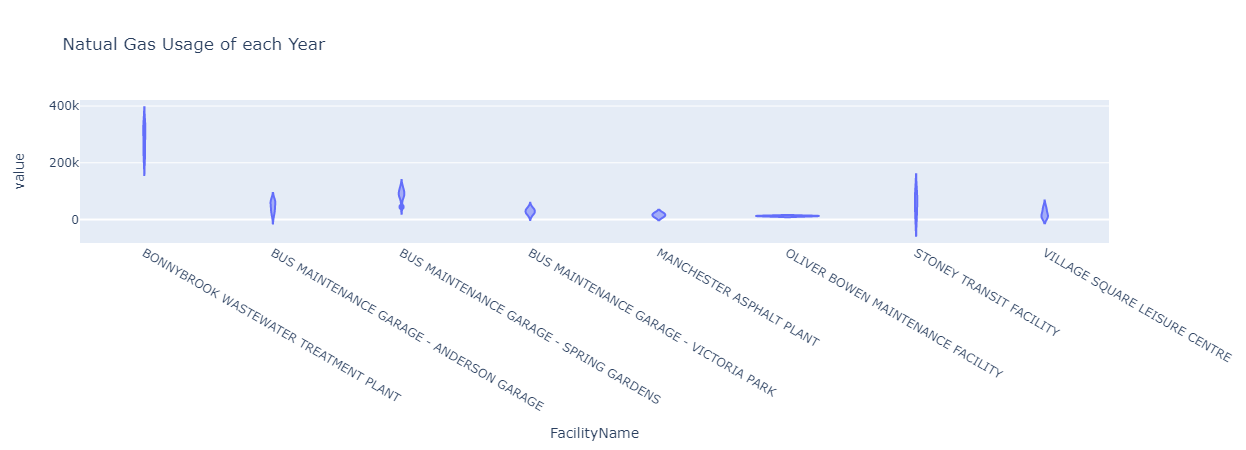

FacilityName,BEARSPAW SALT SILO,BEARSPAW WATER TREATMENT PLANT,CORPORATE WAREHOUSE,CTRAIN STATION - 69TH STREET SW,FIRE HEADQUARTERS,FIRE STATION 07 - MOUNT PLEASANT,FIRE STATION 42 - TUSCANY,GLENMORE WATER TREATMENT PLANT - WB,MANCHESTER BUILDING M,SARCEE OWC - ADMINISTRATION BUILDING,SH - BLDG W (COMPOST FACILITY),SOUTHLAND LEISURE CENTRE,WHITEHORN MULTI SERVICE CENTRE
Year,,,,,,,,,,,,,
2014,30258.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,53333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36003.0,NaN
2016,52745.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162547.0,NaN
2017,41361.0,9791.0,131593.0,NaN,15354.0,1322.0,NaN,292019.0,NaN,NaN,NaN,167406.0,468438.0
2018,21530.0,678536.0,114787.0,18536.0,16725.0,23928.0,1214.0,249129.0,29390.0,32099.0,1052172.0,142226.0,393663.0
2019,44588.0,652587.0,102931.0,34891.0,17176.0,31510.0,19822.0,270977.0,38138.0,52613.0,1316807.0,152230.0,427151.0
2020,22003.0,635422.0,132010.0,41160.0,16572.0,32930.0,18929.0,293788.0,41756.0,56295.0,5369296.0,158293.0,387335.0
2021,25680.0,303027.0,95881.0,28126.0,12328.0,23707.0,14990.0,180644.0,25765.0,39875.0,3088045.0,109947.0,302970.0


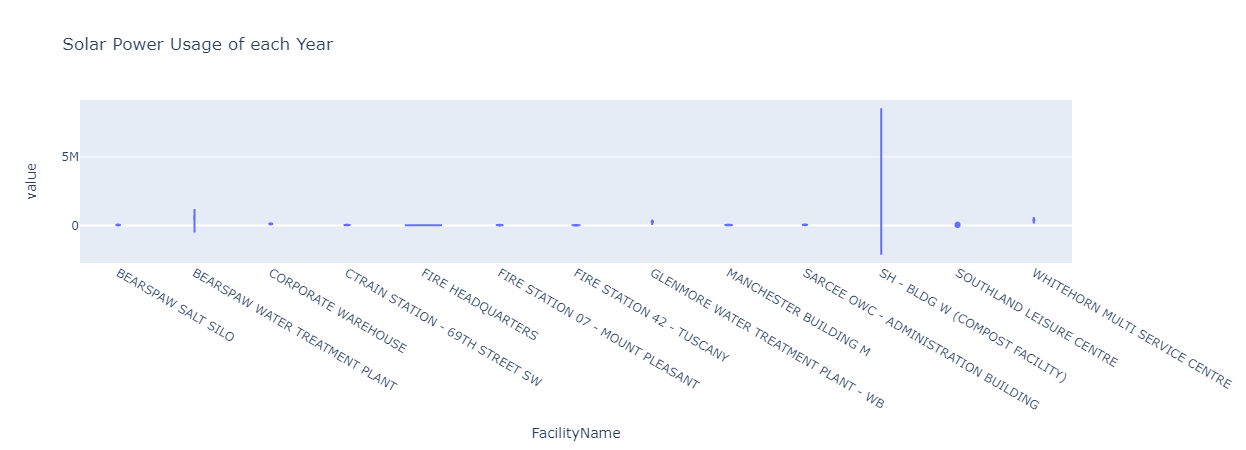

In [21]:
df = pd.DataFrame(rdata,columns=["Business Unit Desc","FacilityName","Site ID", "FacilityAddress","Energy Description",
                                 "Year","Month","Total Consumption","Unit"])
df1=pd.DataFrame.drop(rdata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df1 = df1.loc[df1['Energy Description'] == 'Electricity']
df1=df1.loc[df1['Total Consumption'] > 1000000]
df1=df1.loc[df1['Year'].between(2014,2021)]
df1.name = "Electricity Usage of each Year "
df1=df1.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=0)
display(df1)
fig = px.violin(df1, y=df1.columns, box=True, title = 'Electricity Usage of each Year')
fig.show()

df2=pd.DataFrame.drop(rdata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df2= df2.loc[df2['Energy Description'] == 'Natural Gas']
df2 =df2.loc[df2['Total Consumption'] > 10000]
df2 =df2.loc[df2['Year'].between(2014,2021)]
df2.name = "Natual Gas Usage of each Year "
df2=df2.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=0)
display(df2)
fig = px.violin(df2, y=df2.columns, title ='Natual Gas Usage of each Year ')
fig.show()

df3=pd.DataFrame.drop(rdata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df3 = df3.loc[df3['Energy Description'] == 'Solar Power']
df3=df3.loc[df3['Total Consumption'] > 1000]
df3=df3.loc[df3['Year'].between(2014,2021)]
df3.name = "Solar Power Usage of each Year "
df3=df3.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=0)

display(df3)
fig = px.violin(df3, y=df3.columns, title = 'Solar Power Usage of each Year')
fig.show()